In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

### Part 1 - Tensors

In [2]:
sample_data= [[1, 2, 3], [3, 2, 1]]

# As numpy array
data_numpy= np.array(sample_data)
print(f'Numpy array: \n {data_numpy}')

# As tensor - New
data_tensor= torch.tensor(sample_data)
print(f'Tensor: \n {data_tensor}')

# As tensor - From numpy array
data_tensor= torch.from_numpy(data_numpy)
print(f'Tensor from Numpy: \n {data_tensor}')

# As tensor - From another tensor - Ones
data_tensor_2= torch.ones_like(data_tensor)
print(f'Ones tensor: \n {data_tensor_2}')

# As tensor - From another tensor - Random
data_tensor_3= torch.rand_like(data_tensor, dtype= torch.float)
print(f'Random tensor: \n {data_tensor_3}')

Numpy array: 
 [[1 2 3]
 [3 2 1]]
Tensor: 
 tensor([[1, 2, 3],
        [3, 2, 1]])
Tensor from Numpy: 
 tensor([[1, 2, 3],
        [3, 2, 1]])
Ones tensor: 
 tensor([[1, 1, 1],
        [1, 1, 1]])
Random tensor: 
 tensor([[0.4331, 0.9743, 0.8942],
        [0.8764, 0.2708, 0.8692]])


In [3]:
# With respect to shape
shape= (4, 3,)

# Random tensor
rand_tensor= torch.rand(shape)
print(f'Random tensor: \n {rand_tensor}')

# Ones tensor
ones_tensor= torch.ones(shape)
print(f'Ones tensor: \n {ones_tensor}')

# Zeros tensor
zero_tensor= torch.zeros(shape)
print(f'Zeros tensor: \n {zero_tensor}')

Random tensor: 
 tensor([[0.5561, 0.4225, 0.6881],
        [0.8808, 0.3018, 0.8259],
        [0.1042, 0.3798, 0.9147],
        [0.0631, 0.5397, 0.3467]])
Ones tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Zeros tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [4]:
# Tensor attributes
print(f'Shape: \n {ones_tensor.shape}')
print(f'Datatype: \n {ones_tensor.dtype}')
print(f'Device its stored in: \n {ones_tensor.device}')

Shape: 
 torch.Size([4, 3])
Datatype: 
 torch.float32
Device its stored in: 
 cpu


In [5]:
# Assigning values to an index of a tensor
tensor = torch.rand(4, 3)
tensor[:,1] = 0
print(f'Assigning value: \n {tensor}')

Assigning value: 
 tensor([[0.1229, 0.0000, 0.3065],
        [0.4131, 0.0000, 0.6664],
        [0.1086, 0.0000, 0.6263],
        [0.3104, 0.0000, 0.1299]])


In [6]:
# Concating tensors
concat_tensor = torch.cat([tensor, tensor, tensor], dim=1)
print(concat_tensor)

tensor([[0.1229, 0.0000, 0.3065, 0.1229, 0.0000, 0.3065, 0.1229, 0.0000, 0.3065],
        [0.4131, 0.0000, 0.6664, 0.4131, 0.0000, 0.6664, 0.4131, 0.0000, 0.6664],
        [0.1086, 0.0000, 0.6263, 0.1086, 0.0000, 0.6263, 0.1086, 0.0000, 0.6263],
        [0.3104, 0.0000, 0.1299, 0.3104, 0.0000, 0.1299, 0.3104, 0.0000, 0.1299]])


In [7]:
# Element-wise product
print(f"Element wise product of tensors: \n {tensor.mul(tensor)} \n")

Element wise product of tensors: 
 tensor([[0.0151, 0.0000, 0.0939],
        [0.1706, 0.0000, 0.4441],
        [0.0118, 0.0000, 0.3922],
        [0.0963, 0.0000, 0.0169]]) 



In [8]:
# Matrix multiplication - A * transpose(A)
print(f"Matrix multiplication of tensors: \n {tensor.matmul(tensor.T)} \n")

Matrix multiplication of tensors: 
 tensor([[0.1090, 0.2550, 0.2053, 0.0780],
        [0.2550, 0.6147, 0.4622, 0.2148],
        [0.2053, 0.4622, 0.4040, 0.1151],
        [0.0780, 0.2148, 0.1151, 0.1132]]) 



In [9]:
# In-place operations
print(f'Add 2 to tensor: \n {tensor.add_(2)}')
print(f'Multiply 4 to tensor: \n {tensor.mul_(4)}')
print(f'Divide 2 to tensor: \n {tensor.div_(2)}')

Add 2 to tensor: 
 tensor([[2.1229, 2.0000, 2.3065],
        [2.4131, 2.0000, 2.6664],
        [2.1086, 2.0000, 2.6263],
        [2.3104, 2.0000, 2.1299]])
Multiply 4 to tensor: 
 tensor([[ 8.4917,  8.0000,  9.2259],
        [ 9.6523,  8.0000, 10.6657],
        [ 8.4342,  8.0000, 10.5050],
        [ 9.2415,  8.0000,  8.5196]])
Divide 2 to tensor: 
 tensor([[4.2459, 4.0000, 4.6129],
        [4.8261, 4.0000, 5.3328],
        [4.2171, 4.0000, 5.2525],
        [4.6208, 4.0000, 4.2598]])


In [10]:
# Bridge - Basically pointing to the values between Numpy array & Tensors
print(f"Tensor: \n {ones_tensor}")
numpy_bridge = ones_tensor.numpy()
print(f"Numpy: \n {numpy_bridge}")

ones_tensor.add_(1)
print(f"Tensor: \n {ones_tensor}")
print(f"Numpy: \n {numpy_bridge}")

torch_bridge = torch.from_numpy(data_numpy)

np.add(data_numpy, 1, out=data_numpy)
print(f"Tensor: \n {torch_bridge}")
print(f"Numpy: \n {data_numpy}")

Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Numpy: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Tensor: 
 tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
Numpy: 
 [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
Tensor: 
 tensor([[2, 3, 4],
        [4, 3, 2]])
Numpy: 
 [[2 3 4]
 [4 3 2]]


### Part 2 - Autograd & Differentiation

In [11]:
model= torchvision.models.resnet18(pretrained= True)
data= torch.rand(1, 3, 128, 128)
labels= torch.rand(1, 1000)

In [12]:
prediction = model(data)
loss = (prediction - labels).sum()
loss.backward()

In [13]:
# SGD - Stochastic Gradient Descent
criterion= nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer.step()

In [14]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

# Initializing an equation
Q = 3*a**3 - b**2

In [15]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [16]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


### Part 3 - Neural Networks

In [17]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [18]:
neural_net = Net()
parameter= list(neural_net.parameters())
print(parameter[0])

Parameter containing:
tensor([[[[-0.1648, -0.1697,  0.2588],
          [-0.0387,  0.0900,  0.1299],
          [-0.0836,  0.0240, -0.3243]]],


        [[[ 0.1830,  0.2597,  0.3034],
          [-0.2504,  0.1034, -0.1721],
          [-0.1281,  0.1746, -0.0403]]],


        [[[-0.2586,  0.0690, -0.1409],
          [ 0.0130, -0.2025,  0.2905],
          [-0.1939,  0.0262,  0.1686]]],


        [[[-0.2073, -0.0166, -0.2171],
          [-0.1754,  0.0246,  0.2330],
          [-0.0349, -0.0296, -0.1315]]],


        [[[-0.0241, -0.0907, -0.2589],
          [ 0.0035, -0.0816,  0.0434],
          [-0.1244,  0.1357, -0.2637]]],


        [[[ 0.2039,  0.0029,  0.2922],
          [ 0.0328,  0.1260, -0.1118],
          [-0.0238, -0.3224, -0.1261]]]], requires_grad=True)


In [19]:
input = torch.randn(1, 1, 32, 32)
out = neural_net(input)
print(out)

tensor([[-0.0263, -0.1240,  0.0452, -0.0980, -0.0644,  0.0245,  0.0244,  0.1503,
         -0.1004,  0.0393]], grad_fn=<AddmmBackward>)


In [20]:
neural_net.zero_grad()
out.backward(torch.randn(1, 10))

In [21]:
target = torch.randn(10)
target = target.view(1, -1)

loss = criterion(out, target)
print(loss)

tensor(0.8655, grad_fn=<MseLossBackward>)


In [22]:
neural_net.zero_grad()
print('Gradient before backward propagation')
print(neural_net.conv1.bias.grad)

# loss.backward(retain_graph= True)
print('Gradient after backward propagation')
print(neural_net.conv1.bias.grad)

Gradient before backward propagation
tensor([0., 0., 0., 0., 0., 0.])
Gradient after backward propagation
tensor([0., 0., 0., 0., 0., 0.])


In [23]:
learning_rate = 0.01
for f in neural_net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [24]:
optimizer.zero_grad()
output = neural_net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()   

### Part 4 - Classifier

In [25]:
class CIFAR_Net(nn.Module):
    def __init__(self):
        super(CIFAR_Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [26]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


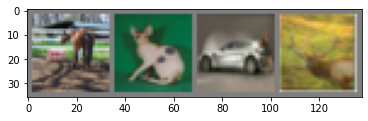

horse   cat   car  deer


In [27]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [28]:
classifier= CIFAR_Net()
criterion= nn.CrossEntropyLoss()
optimizer= optim.SGD(classifier.parameters(), lr= 0.01, momentum= 0.9)

In [29]:
loss_trend= list()
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inp, labels = data
        optimizer.zero_grad()
        pred = classifier(inp)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            loss_trend.append(running_loss/2000)
            running_loss = 0.0

[1,  2000] loss: 2.060
[1,  4000] loss: 1.961
[1,  6000] loss: 1.940
[1,  8000] loss: 1.954
[1, 10000] loss: 1.966
[1, 12000] loss: 1.959
[2,  2000] loss: 1.981
[2,  4000] loss: 2.006
[2,  6000] loss: 1.959
[2,  8000] loss: 2.015
[2, 10000] loss: 1.989
[2, 12000] loss: 1.975


Loss of the Neural Network


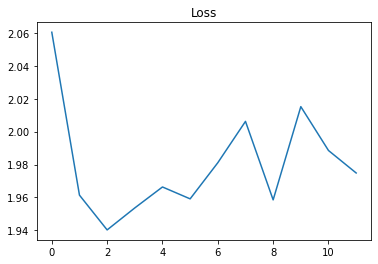

In [30]:
print('Loss of the Neural Network')
plt.title('Loss')
plt.plot(loss_trend)

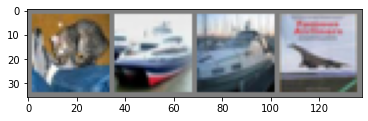

GroundTruth:    cat  ship  ship plane


In [31]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [33]:
prediction= classifier(images)
_, predicted = torch.max(prediction, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship


In [34]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 22 %


In [35]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = classifier(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  1 %
Accuracy of   car : 49 %
Accuracy of  bird : 17 %
Accuracy of   cat : 36 %
Accuracy of  deer :  0 %
Accuracy of   dog : 15 %
Accuracy of  frog : 28 %
Accuracy of horse : 14 %
Accuracy of  ship : 60 %
Accuracy of truck :  7 %
